# SVM Exercises

9. SVM on linearly separatable dataset

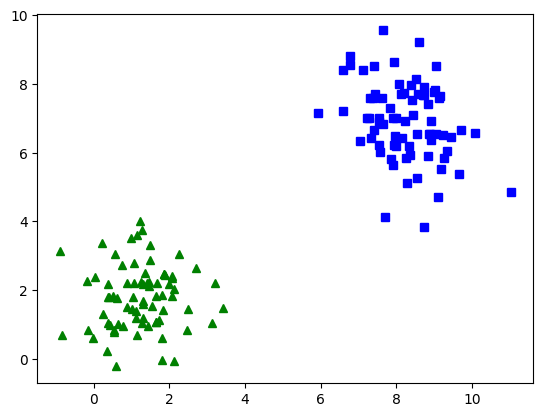

In [11]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

X, y = datasets.make_blobs(n_samples=150, centers=2, n_features=2, center_box=(0, 10))
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'g^')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bs')
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import SGDClassifier
lin_svc = LinearSVC()
lin_svc.fit(X_train, y_train)
print(lin_svc.score(X_test, y_test))

1.0


In [22]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
print(svc.score(X_test, y_test))

1.0


In [23]:
SGDClassifier = SGDClassifier()
SGDClassifier.fit(X_train, y_train)
print(SGDClassifier.score(X_test, y_test))

1.0


10. SVM on a wine dataset

In [51]:
from sklearn.datasets import load_wine
wine = load_wine()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [52]:
from sklearn.multiclass import OneVsRestClassifier
svc = OneVsRestClassifier(SVC(kernel='linear'))
svc.fit(X_train, y_train)

OneVsRestClassifier(estimator=SVC(kernel='linear'))

In [53]:
svc.score(X_test, y_test)

0.9444444444444444

11. SVM Regressor on a California housing dataset

In [91]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

california = fetch_california_housing()
X, y = california.data, california.target
X = pd.DataFrame(X, columns=california.feature_names)

In [94]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [95]:
num_attribs = ["Longitude", "Latitude", "AveRooms", "AveBedrms", "Population", "AveOccup", "MedInc"]
num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())



In [96]:
X_train, X_test, y_train, y_test = train_test_split(num_pipeline.fit_transform(X)[:2000], y[:2000], test_size=0.3)

In [98]:
from sklearn.svm import SVR
svr = SVR(kernel = "rbf")
svr.fit(X_train, y_train)
svr.score(X_test, y_test)

0.7252690331743321

In [100]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'kernel': ['linear', 'rbf'], 
     'C': [1, 10, 100, 1000],
     'gamma': [0.01, 0.1, 1, 10]}
]
grid = GridSearchCV(SVR(), param_grid, cv=3, verbose=2)
grid.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END .....................C=1, gamma=0.01, kernel=linear; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ........................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ......................C=1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1

GridSearchCV(cv=3, estimator=SVR(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.1, 1, 10],
                          'kernel': ['linear', 'rbf']}],
             verbose=2)

In [101]:
print(f"rmse = {grid.best_score_}")

rmse = 0.7560140546811839
